# Neural Networks - Part 1

## Motivation

Artificial neural networks are models trying to imitate a biological neural network as we can see in the following figure:

![Neural Network](../../images/neural_networks.png)

Neural networks have been became popular in the last decade since the great variety of taks that they can address, not just regression and classification challenges. Another reason is that computer are more powerful that a few decades ago, that implies we can work with more data (not only tabular) and also train more complex models.

![NN Cat](../../images/cat_nn.png)

## Example

Consider a set of labeled points, with two categories (0 and 1). The goal is to construct a mapping from $\mathbb{R}^2$ to $\{0, 1\}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set_theme(style="whitegrid")

%matplotlib inline

In [2]:
x = torch.tensor(
    [
        [0.1, 0.1],
        [0.3, 0.4],
        [0.1, 0.5],
        [0.6, 0.9],
        [0.4, 0.2],
        [0.6, 0.3],
        [0.5, 0.6],
        [0.9, 0.2],
        [0.4, 0.4],
        [0.7, 0.6]
    ]
)
y = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).reshape(-1, 1)

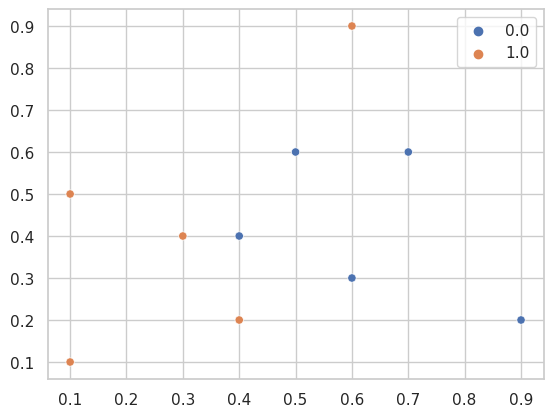

In [3]:
sns.scatterplot(
    x=x.numpy()[:,0],
    y=x.numpy()[:,1],
    hue=y.numpy().ravel(),
)
plt.show()

The artificial neural network approach uses repeated application of a simple, nonlinear function. We will base our network on the sigmoid function:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

We may regard $\sigma(x)$ as a smoothed version of a step function, which itself mimics the behavior of a neuron in the brain.

The steepness and location of the transition in the sigmoid function may be altered by scaling and shifting the argument or, in the language of neural networks, by _weighting_ and _biasing_ the input. Let $a$ be a vector produced by the neurons in one layer, then the vector of outputs from the next layer has the form

$$
\sigma \left( W a + b\right)
$$

where $W$ is the matrix of weights and $b$ the vector of $biases$. The number of columns
in W matches the number of neurons that produced the vector a at the previous layer. The number of rows in $W$ matches the number of neurons at the current layer. The number of components in $b$ also matches the number of neurons at the current layer.

Let's consider the following example of an artificial neural network with four layers:

![Example NN with four layers](../../images/nn_four_layers.png)

Since the input data has the form $x \in \mathbb{R}^2$, the weights and biases for the second layer may be represented by a matrix $W^{[2]} \in \mathbb{R}^{2 \times 2}$ and a vector $b^{[2]} \in \mathbb{R}^2$, respectively. The output from the second layer has the form

$$
a^{[2]} = \sigma \left( W^{[2]} x + b^{[2]} \right) \in \mathbb{R}^2
$$

The third layer has three neurons, then $W^{[3]} \in \mathbb{R}^{3 \times 2}$, $b^{[2]} \in \mathbb{R}^3$ and the output from the third layer is

$$
a^{[3]} = \sigma \left( W^{[3]} a^{[2]} + b^{[3]} \right) =  \sigma\left(  W^{[3]} \sigma \left( W^{[2]} x + b^{[2]} \right)  + b^{[3]} \right)\in \mathbb{R}^3
$$

Finally, for the fourth (output) layer $W^{[4]} \in \mathbb{R}^{2 \times 3}$ and $b^{[4]} \in \mathbb{R}^2$. The output of the overall network has the form

$$
\begin{aligned}
F(x)
&= \sigma \left( W^{[4]} a^{[3]} + b^{[4]} \right) \\
&= \sigma \left( W^{[4]} \sigma \left( W^{[3]} a^{[2]} + b^{[3]} \right)  + b^{[4]} \right) \\
&= \sigma \left( W^{[4]} \sigma \left( W^{[3]} \sigma \left( W^{[2]} x + b^{[2]} \right) + b^{[3]} \right)  + b^{[4]} \right) \in \mathbb{R}^2
\end{aligned}
$$

Note that the input layer has to have two neurons since we are only working with a input with two features and the output layer also has two neurons but in this case is because there are only two categories.


In [4]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(2, 4),
    torch.nn.Sigmoid(),
    torch.nn.Linear(4, 1),
    torch.nn.Sigmoid()
)

This neural network define a function $F: \mathbb{R}^2 \to \mathbb{R}^2$ in terms of its 23 parameters (entries in the wright matrices and bias vectors). Without loss of generality, we can encode the categories as vectors,

$$
A : \begin{pmatrix} 1 \\ 0 \end{pmatrix}
\quad
\text{and}
\quad
B : \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

We need to optimize over the 23 parameters in order to classify the inputs into categories A or B.

In [5]:
loss_fn = torch.nn.BCELoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Then we need to trrain our model

In [6]:
losses = []
for epoch in range(10000):
    pred_y = model(x)
    loss = loss_fn(pred_y, y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

And now we can see how the loss function was improving in each epoch (for this case, each epoch is an iteartion).

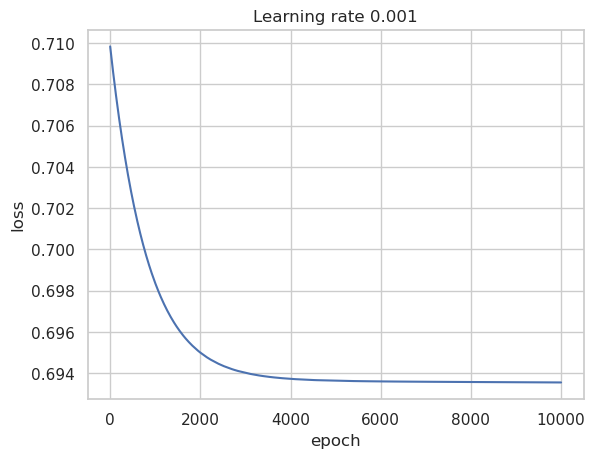

In [7]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title(f"Learning rate {learning_rate}")
plt.show()

In [8]:
model(torch.tensor([[0.7, 0.2]]))

tensor([[0.5017]], grad_fn=<SigmoidBackward0>)

Sources:

- [Deep Learning: An Introduction for Applied Mathematicians](https://epubs.siam.org/doi/10.1137/18M1165748)